In [90]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

In [91]:

# Load the VTI file
vti_file = "Tortousity_air_snow_Bicubic.vti"
img = pv.read(vti_file)
dims = img.dimensions
z_dim = dims[2]
img.array_names

['ws', 'C_x', 'C_y', 'C_z']

In [92]:
img['C_x'].shape

(1000000,)

In [117]:
dims = np.array(img.dimensions)- np.array((1,1,1))
dims

array([100, 100, 100])

In [134]:
def tort_cross_z(dataset, data_name):
# Get the dimensions of the dataset
    dims = np.array(dataset.dimensions)- np.array((1,1,1))
    img = dataset[data_name].reshape(dims)

    # Prepare to store average intensities
    average_intensities = []

    # Loop over each z-plane
    for i in range(img.shape[0]):
        
        # Compute the average intensity for this slice
        average_intensity = np.mean(img[-i][img[-i]>0.1])
        average_intensities.append(average_intensity)
    
    return average_intensities



In [ ]:
def get_conc_cor(path, ref_path, direction ,axis):
    cor = []
    img = pv.read(path)
    ref_img = pv.read(ref_path)
    dims = np.array(img.dimensions)- np.array((1,1,1))
    img = img[direction][:,axis].reshape(dims)
    ref_img = ref_img[direction][:,axis].reshape(dims)
    for i in range(img.shape[0]):
        cor.append(np.corrcoef(img[i].ravel(),ref_img[i].ravel())[0][1])
    return cor

In [259]:
snow_files = ['Tortousity_air_snow_Bicubic.vti', 'Tortousity_air_snow_SRResnet.vti','Tortousity_air_snow_High-res.vti']
firn_files = ['Tortousity_air_firn_Bicubic.vti', 'Tortousity_air_firn_SRResnet.vti','Tortousity_air_firn_High-res.vti']
#ice_files = ['Tortousity_ice_ice_Bicubic.vti', 'Tortousity_ice_ice_High-res.vti', 'Tortousity_ice_ice_SRResnet.vti']

In [272]:
conces = []
for p in snow_files + firn_files:
    img = pv.read(p)['C_z']
    img = img[img>0.1]
    conces.append(img)


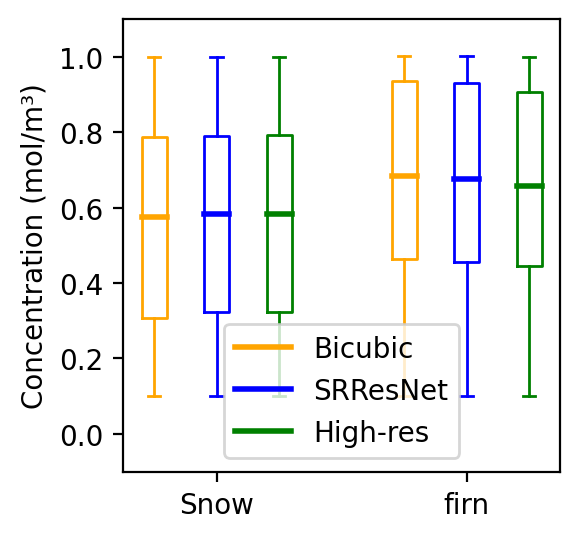

In [308]:
plt.figure(figsize=(3, 2.8))

# Define styling for each boxplot component
medianprops = {'color': 'orange', 'linewidth': 2}
boxprops = {'color': 'orange', 'linestyle': '-'}
whiskerprops = {'color': 'orange', 'linestyle': '-'}
capprops = {'color': 'orange', 'linestyle': '-'}
flierprops = {'color': 'w', 'marker': '.'}

plt.boxplot(conces[0], positions=[1], widths=0.4,
           medianprops=medianprops,
           boxprops=boxprops,
           whiskerprops=whiskerprops,
           capprops=capprops,
           showfliers=False)


# Define styling for each boxplot component
medianprops = {'color': 'Blue', 'linewidth': 2}
boxprops = {'color': 'Blue', 'linestyle': '-'}
whiskerprops = {'color': 'Blue', 'linestyle': '-'}
capprops = {'color': 'Blue', 'linestyle': '-'}
flierprops = {'color': 'w', 'marker': '.'}

plt.boxplot(conces[1], positions=[2], widths=0.4,
           medianprops=medianprops,
           boxprops=boxprops,
           whiskerprops=whiskerprops,
           capprops=capprops,
           showfliers=False)

# Define styling for each boxplot component
medianprops = {'color': 'Green', 'linewidth': 2}
boxprops = {'color': 'Green', 'linestyle': '-'}
whiskerprops = {'color': 'Green', 'linestyle': '-'}
capprops = {'color': 'Green', 'linestyle': '-'}
flierprops = {'color': 'w', 'marker': '.'}

plt.boxplot(conces[2], positions=[3], widths=0.4,
           medianprops=medianprops,
           boxprops=boxprops,
           whiskerprops=whiskerprops,
           capprops=capprops,
           showfliers=False)



# Define styling for each boxplot component
medianprops = {'color': 'Orange', 'linewidth': 2}
boxprops = {'color': 'Orange', 'linestyle': '-'}
whiskerprops = {'color': 'Orange', 'linestyle': '-'}
capprops = {'color': 'Orange', 'linestyle': '-'}
flierprops = {'color': 'w', 'marker': '.'}

plt.boxplot(conces[3], positions=[5],
           medianprops=medianprops, widths=0.4,
           boxprops=boxprops,
           whiskerprops=whiskerprops,
           capprops=capprops,
           showfliers=True)

# Define styling for each boxplot component
medianprops = {'color': 'Blue', 'linewidth': 2}
boxprops = {'color': 'Blue', 'linestyle': '-'}
whiskerprops = {'color': 'Blue', 'linestyle': '-'}
capprops = {'color': 'Blue', 'linestyle': '-'}
flierprops = {'color': 'w', 'marker': '.'}

plt.boxplot(conces[4], positions=[6], widths=0.4,
           medianprops=medianprops,
           boxprops=boxprops,
           whiskerprops=whiskerprops,
           capprops=capprops,
           showfliers=True)


# Define styling for each boxplot component
medianprops = {'color': 'Green', 'linewidth': 2}
boxprops = {'color': 'Green', 'linestyle': '-'}
whiskerprops = {'color': 'Green', 'linestyle': '-'}
capprops = {'color': 'Green', 'linestyle': '-'}
flierprops = {'color': 'w', 'marker': '.'}

plt.boxplot(conces[5], positions=[7], widths=0.4,
           medianprops=medianprops,
           boxprops=boxprops,
           whiskerprops=whiskerprops,
           capprops=capprops,
           showfliers=True)


# Set plot title and labels
plt.title('')
plt.ylabel('Concentration (mol/m³)')
#plt.xlabel('')
legend_elements = [
    plt.Line2D([0], [0], color='orange', lw=2, label='Bicubic'),
    plt.Line2D([0], [0], color='b', lw=2, label='SRResNet'),
    plt.Line2D([0], [0], color='g', lw=2, label='High-res')
]

plt.ylim(-0.1,1.1)
# Add legend
plt.legend(handles=legend_elements, loc ='lower center', ncol=1 )
plt.xticks([2, 6], ['Snow', 'firn'])
# Adjust spacing between subplots
plt.tight_layout()
# Show plot
plt.savefig('Tort_hist.png', dpi = 400)
plt.show()


In [281]:
def get_cncens(path, ref_path, direction):
    cncens = []
    img = pv.read(path)
    ref_img = pv.read(ref_path)
    dims = np.array(img.dimensions)- np.array((1,1,1))
    img = img[direction].reshape(dims)
    ref_img = ref_img[direction].reshape(dims)
    for i in range(1, img.shape[0]-1):
        cncens.append(np.corrcoef(img[i].ravel(),ref_img[i].ravel())[0][1])
    return cncens

In [284]:
snow_concen_corr = [get_cncens(snow_files[0],snow_files[2],'C_z'),
                    get_cncens(snow_files[1],snow_files[2],'C_z')]
firn_concen_corr = [get_cncens(firn_files[0],firn_files[2],'C_z'),
                    get_cncens(firn_files[1],firn_files[2],'C_z')]

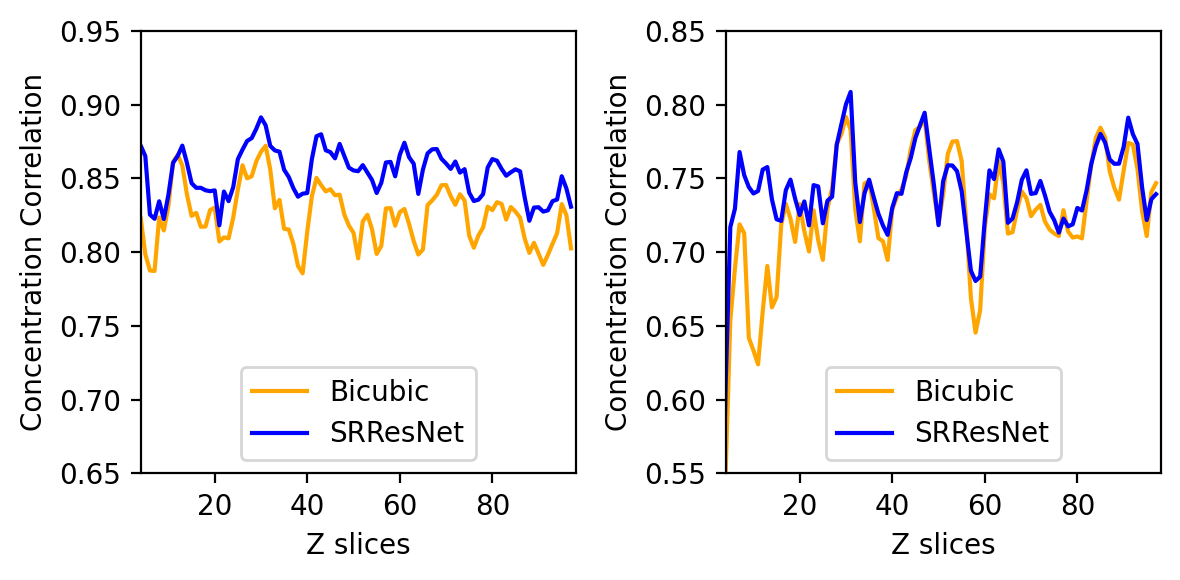

In [297]:
ig, axes = plt.subplots(1, 2, figsize=(6, 3))

axes[0].plot(snow_concen_corr[0],color = 'Orange',label='Bicubic')
axes[0].plot(snow_concen_corr[1],color='Blue', label='SRResNet')
axes[0].set_xlabel('Z slices')
axes[0].set_ylabel('Concentration Correlation')
axes[0].set_xlim(4,98)
axes[0].set_ylim(0.65,0.95)
axes[0].legend(loc='lower center')

axes[1].plot(firn_concen_corr[0],color = 'Orange',label='Bicubic')
axes[1].plot(firn_concen_corr[1],color='Blue', label='SRResNet')
axes[1].set_xlabel('Z slices')
axes[1].set_ylabel('Concentration Correlation')
axes[1].set_xlim(4,98)
axes[1].set_ylim(0.55,0.85)
axes[1].legend(loc='lower center')
plt.tight_layout()
plt.savefig('concentration_cor.png', dpi=400)

In [62]:
vti_files = ["permeability_new_snow_Bicubic.vti",'permeability_new_snow_SRResnet.vti','permeability_new_snow_High-res.vti']
velocities=[]

for p in vti_files:
    print (p)
    img = pv.read(p)
    dims = img.dimensions
    z_dim = dims[2]
    v_x, v_y, v_z = img['u_z'][:,0],img['u_z'][:,1],img['u_z'][:,2]
    v_x, v_y, v_z =v_x [v_x>0], v_y[v_y>0], v_z [v_z>0] 
    velocities.append((v_x, v_y, v_z))
    print(img.array_names)
    print (img['u_z'].shape)

permeability_new_snow_Bicubic.vti
['ws', 'u_x', 'u_y', 'u_z']
(1000000, 3)
permeability_new_snow_SRResnet.vti
['ws', 'u_x', 'u_y', 'u_z']
(1000000, 3)
permeability_new_snow_High-res.vti
['ws', 'u_x', 'u_y', 'u_z']
(1000000, 3)


In [204]:
def get_cor(path, ref_path, direction ,axis):
    cor = []
    img = pv.read(path)
    ref_img = pv.read(ref_path)
    dims = np.array(img.dimensions)- np.array((1,1,1))
    img = img[direction][:,axis].reshape(dims)
    ref_img = ref_img[direction][:,axis].reshape(dims)
    for i in range(img.shape[0]):
        cor.append(np.corrcoef(img[i].ravel(),ref_img[i].ravel())[0][1])
    return cor

In [205]:
bicubic_cor = [get_cor(vti_files[0],vti_files[2],'u_z',axis=0),
               get_cor(vti_files[0],vti_files[2],'u_z',axis=1),
               get_cor(vti_files[0],vti_files[2],'u_z',axis=2)]

srresnet_cor = [get_cor(vti_files[1],vti_files[2],'u_z',axis=0),
               get_cor(vti_files[1],vti_files[2],'u_z',axis=1),
               get_cor(vti_files[1],vti_files[2],'u_z',axis=2)]

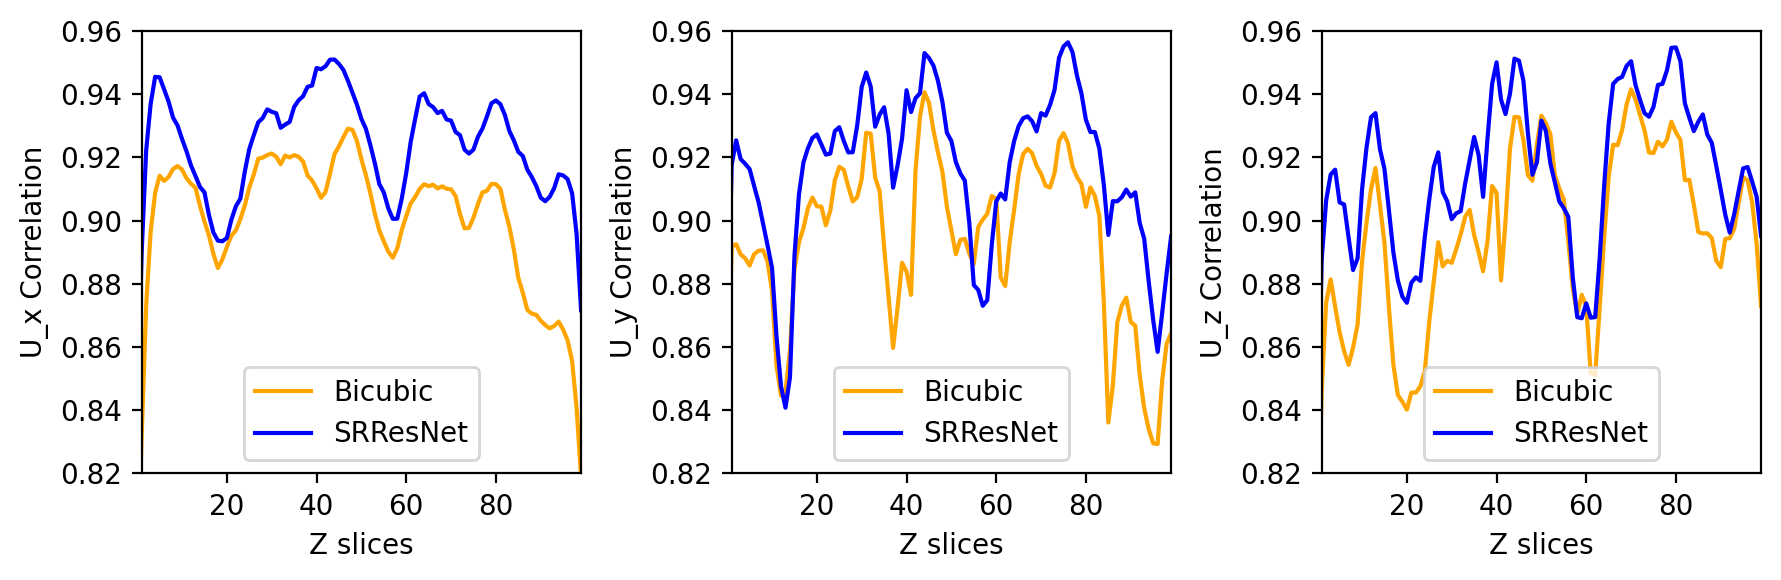

In [227]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

axes[0].plot(bicubic_cor[2],color = 'Orange',label='Bicubic')
axes[0].plot(srresnet_cor[2],color='Blue', label='SRResNet')
axes[0].set_xlabel('Z slices')
axes[0].set_ylabel('U_x Correlation')
axes[0].set_xlim(1,99)
axes[0].set_ylim(0.82,0.96)
axes[0].legend(loc='lower center')

axes[1].plot(bicubic_cor[1],color = 'Orange',label='Bicubic')
axes[1].plot(srresnet_cor[1],color='Blue', label='SRResNet')
axes[1].set_xlabel('Z slices')
axes[1].set_ylabel('U_y Correlation')
axes[1].set_xlim(1,99)
axes[1].set_ylim(0.82,0.96)
axes[1].legend(loc='lower center')

axes[2].plot(bicubic_cor[0],color = 'Orange',label='Bicubic')
axes[2].plot(srresnet_cor[0],color='Blue', label='SRResNet')
axes[2].set_xlabel('Z slices')
axes[2].set_ylabel('U_z Correlation')
axes[2].set_xlim(1,99)
axes[2].set_ylim(0.82,0.96)
axes[2].legend(loc='lower center')
plt.tight_layout()
plt.savefig('perm_cor.png', dpi=400)

In [181]:
img_Bi = pv.read(vti_files[0])
img_SR = pv.read(vti_files[1])['u_z'][:,0]
img_HR = pv.read(vti_files[2])['u_z'][:,0]

In [ ]:
img = dataset[data_name].reshape(dims)

In [177]:
cor = np.corrcoef(img_Bi,img_HR)

In [182]:
dims = np.array(img_Bi.dimensions)- np.array((1,1,1))
print (dims)

[100 100 100]


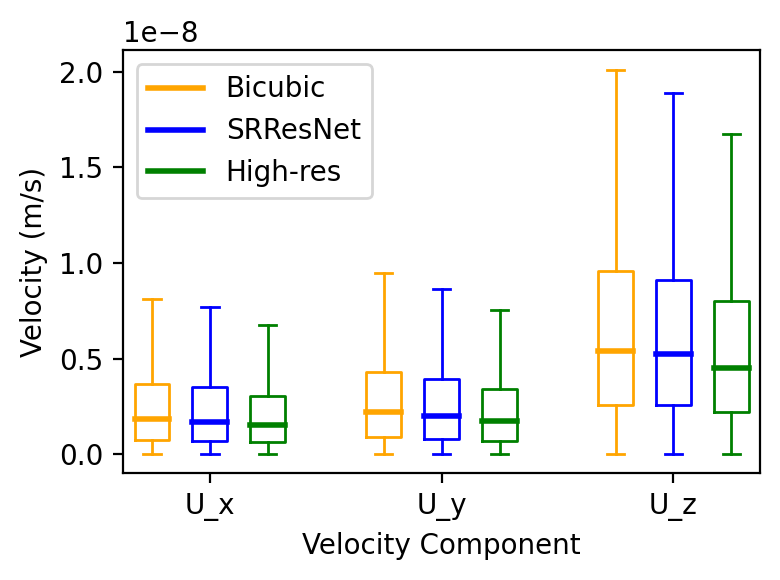

In [313]:

plt.figure(figsize=(4, 3))

# Define styling for each boxplot component
medianprops = {'color': 'orange', 'linewidth': 2}
boxprops = {'color': 'orange', 'linestyle': '-'}
whiskerprops = {'color': 'orange', 'linestyle': '-'}
capprops = {'color': 'orange', 'linestyle': '-'}
flierprops = {'color': 'w', 'marker': '.'}

plt.boxplot(velocities[0], positions=[1,5,9],widths=0.6,
           medianprops=medianprops,
           boxprops=boxprops,
           whiskerprops=whiskerprops,
           capprops=capprops,
           showfliers=False)

# Define styling for each boxplot component
medianprops = {'color': 'b', 'linewidth': 2}
boxprops = {'color': 'b', 'linestyle': '-'}
whiskerprops = {'color': 'b', 'linestyle': '-'}
capprops = {'color': 'b', 'linestyle': '-'}
flierprops = {'color': 'w', 'marker': '.'}

plt.boxplot(velocities[1], positions=[2,6,10],widths=0.6,
           medianprops=medianprops,
           boxprops=boxprops,
           whiskerprops=whiskerprops,
           capprops=capprops,
           showfliers=False)

# Define styling for each boxplot component
medianprops = {'color': 'g', 'linewidth': 2}
boxprops = {'color': 'g', 'linestyle': '-'}
whiskerprops = {'color': 'g', 'linestyle': '-'}
capprops = {'color': 'g', 'linestyle': '-'}
flierprops = {'color': 'w', 'marker': '.'}

plt.boxplot(velocities[2], positions=[3,7,11],widths=0.6,
           medianprops=medianprops,
           boxprops=boxprops,
           whiskerprops=whiskerprops,
           capprops=capprops,
           showfliers=False)

# Set plot title and labels
plt.title('')
plt.ylabel('Velocity (m/s)')
plt.xlabel('Velocity Component')
legend_elements = [
    plt.Line2D([0], [0], color='orange', lw=2, label='Bicubic'),
    plt.Line2D([0], [0], color='b', lw=2, label='SRResNet'),
    plt.Line2D([0], [0], color='g', lw=2, label='High-res')
]
# Add legend
plt.legend(handles=legend_elements)
plt.xticks([2, 6, 10], ['U_x', 'U_y', 'U_z'])
# Adjust spacing between subplots
plt.tight_layout()
# Show plot
plt.savefig('velocity_histogram.png', dpi = 400)
plt.show()
